 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [273]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [274]:
# Reading whale returns
# Set the file path
whale_data = Path("whale_returns.csv")
# Read the CSV and set the `date` column as a datetime index to the DataFrame
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [275]:
# Count nulls
whale_df.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [276]:
# Drop nulls
whale_df = whale_df.dropna().copy()

In [277]:
# Read head of whale DataFrame
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [278]:
# Reading algorithmic returns
# Set the file path
algo_data = Path("algo_returns.csv")
# Read the CSV and set the `date` column as a datetime index to the DataFrame
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [279]:
# Count nulls
algo_df.isnull().mean()*100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [280]:
# Drop nulls
algo_df = algo_df.dropna().copy()

In [281]:
# Read head of algo DataFrame
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [282]:
# Reading S&P TSX 60 Closing Prices
# Set the file path
sp_tsx_data = Path("sp_tsx_history.csv")
# Read the CSV and set the `date` column as a datetime index to the DataFrame
sp_tsx_df = pd.read_csv(sp_tsx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [283]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [284]:
# Fix Data Types
# Remove $ symbol
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")
sp_tsx_df["Close"]

/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


Date
2012-10-01    12,370.19
2012-10-02    12,391.23
2012-10-03    12,359.47
2012-10-04    12,447.68
2012-10-05    12,418.99
                ...    
2019-12-20    17,118.44
2019-12-23    17,128.71
2019-12-24    17,180.15
2019-12-27    17,168.21
2019-12-30    17,098.56
Name: Close, Length: 1818, dtype: object

In [285]:
# Remove commas symbol
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "")
sp_tsx_df["Close"]

Date
2012-10-01    12370.19
2012-10-02    12391.23
2012-10-03    12359.47
2012-10-04    12447.68
2012-10-05    12418.99
                ...   
2019-12-20    17118.44
2019-12-23    17128.71
2019-12-24    17180.15
2019-12-27    17168.21
2019-12-30    17098.56
Name: Close, Length: 1818, dtype: object

In [286]:
# Change to float
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype(float, errors = 'raise')

In [287]:
# Calculate Daily Returns
sp_daily_returns = sp_tsx_df.pct_change()
sp_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [288]:
# Count nulls
sp_daily_returns.isnull().mean()*100

Close    0.055006
dtype: float64

In [289]:
# Drop nulls
sp_daily_returns = sp_daily_returns.dropna().copy()
sp_daily_returns.isnull().mean()*100

Close    0.0
dtype: float64

In [290]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_returns.columns = ["Daily Returns"]
sp_daily_returns

,Daily Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [291]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a 
# single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_df, algo_df, sp_daily_returns], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [292]:
# Sort datetime index in ascending order (past to present)
all_returns = all_returns.sort_index(ascending = True)

# Set column names
all_returns.rename(columns={"Daily Returns":"S&P TSX"}, inplace=True)

# Display a few rows
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

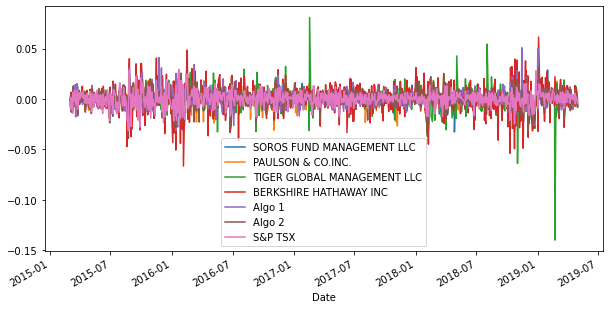

In [293]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

In [294]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<AxesSubplot:xlabel='Date'>

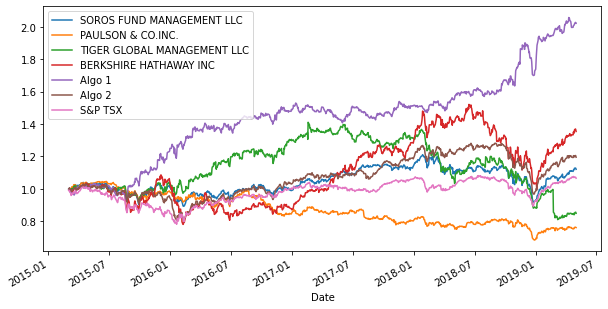

In [295]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

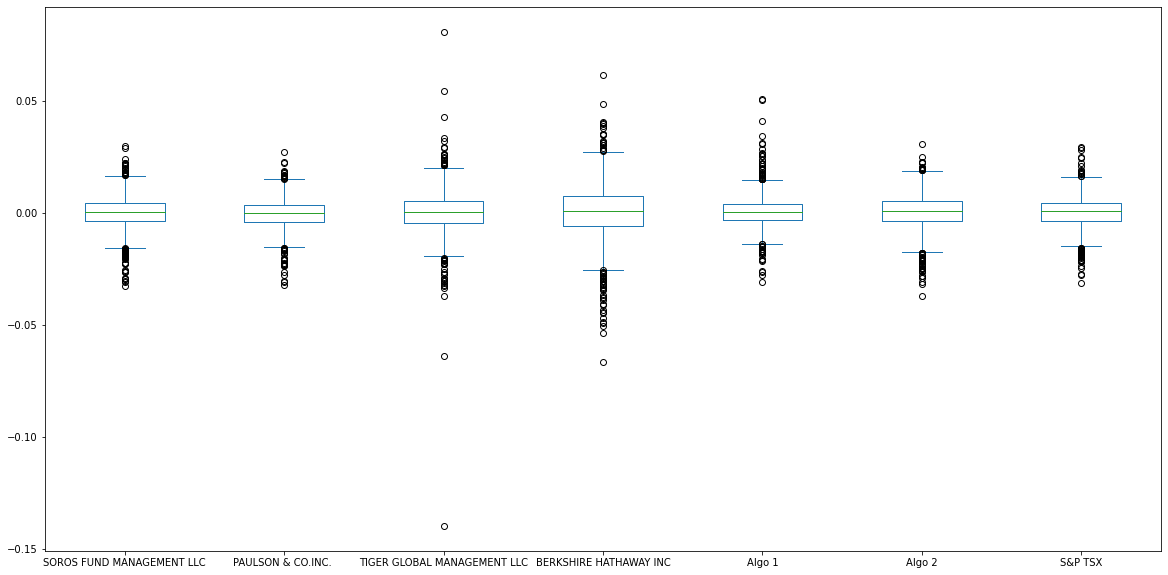

In [364]:
# Box plot to visually show risk
all_returns.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [297]:
# Calculate the daily standard deviations of all portfolios
daily_std = all_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [298]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx_std = all_returns["S&P TSX"].std()
tsx_std

0.007034167748577725

In [366]:
# Determine which portfolios are riskier than the S&P TSX 60
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [369]:
#Print portfolios which are riskier than the S&P TSX
[name for name in daily_std[0:5].keys()]

['BERKSHIRE HATHAWAY INC',
 'TIGER GLOBAL MANAGEMENT LLC',
 'Algo 2',
 'SOROS FUND MANAGEMENT LLC',
 'Algo 1']

### Calculate the Annualized Standard Deviation

In [301]:
# Calculate the annualized standard deviation (252 trading days)
annualised_std = daily_std * np.sqrt(252)
annualised_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [302]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = all_returns.rolling(window=21).std()
rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:xlabel='Date'>

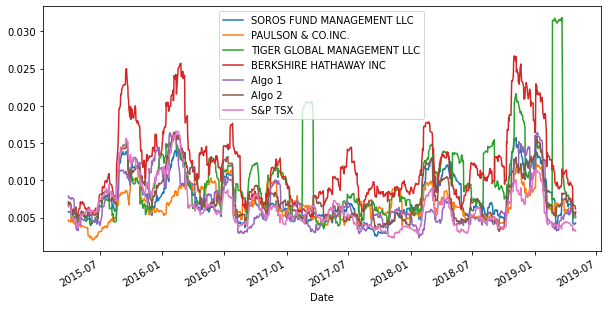

In [303]:
# Plot the rolling standard deviation
rolling_std.plot(figsize=(10,5))

### Calculate and plot the correlation

In [304]:
# Calculate the correlation
correlation = all_returns.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


In [305]:
# Plot correlation
# Import the Seaborn library
import seaborn as sns

<AxesSubplot:>

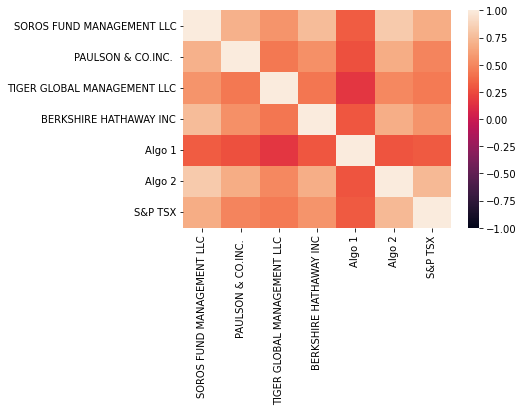

In [306]:
# Use the 'heatmap' function from the Seaborn library to visualise correlation
sns.heatmap(correlation, vmin = -1, vmax = 1)

<AxesSubplot:>

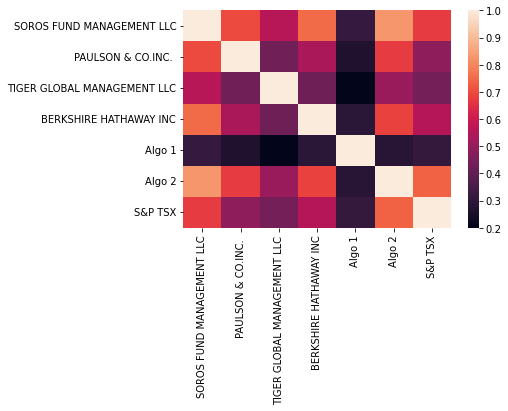

In [307]:
# Use the 'heatmap' function from the Seaborn library to visualise correlation
sns.heatmap(correlation, vmin = 0.2, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [308]:
# Calculate covariance of a single portfolio
    # Use Algo 1 and S&P TSX 60
algo1_covariance = all_returns["Algo 1"].cov(all_returns["S&P TSX"])
algo1_covariance

1.6563000308911385e-05

In [309]:
# Calculate variance of S&P TSX
variance = all_returns["S&P TSX"].var()
variance

4.9479515915131015e-05

In [310]:
# Computing beta
algo1_beta = algo1_covariance / variance
algo1_beta

0.3347445908185686

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

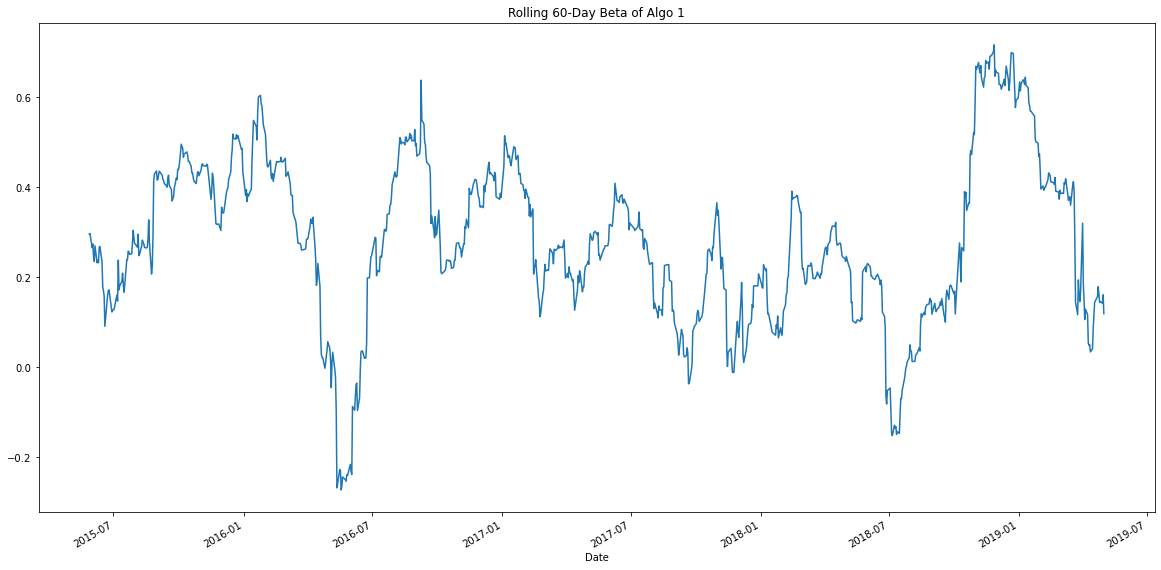

In [311]:
# Plot beta trend
# Calculate and plot the 60-day rolling beta for it and the S&P TSX 60

algo1_rolling_covariance = all_returns["Algo 1"].rolling(window=60).cov(all_returns["S&P TSX"])
rolling_variance = all_returns["S&P TSX"].rolling(window=60).var()
rolling_beta = algo1_rolling_covariance / rolling_variance

rolling_beta.plot(figsize = (20,10), title="Rolling 60-Day Beta of Algo 1")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [312]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [313]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

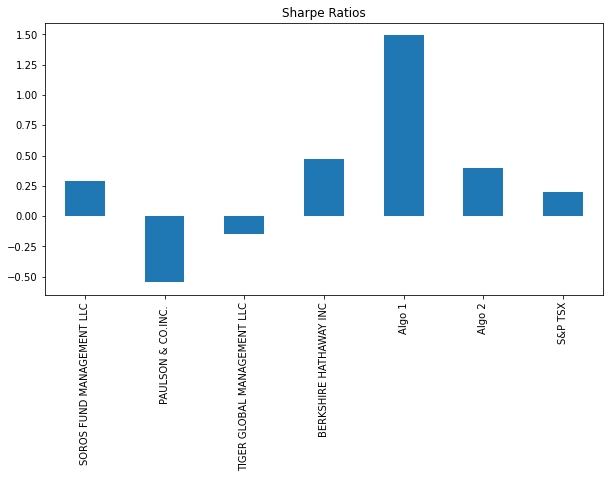

In [314]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title = "Sharpe Ratios", figsize=(10,5))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
Algo 1 significantly outperforms the market (S&P TSX 60) and whale portfolios as represented in the chart and its Sharpe ratio of 1.49. This is particularly so given that -

> "As a rule of thumb, a Sharpe ratio above 0.5 is market-beating performance if achieved over the long run. A ratio of 1 is superb and difficult to achieve over long periods of time". 
(per class slides for class 3.3)

Algo 2 outperforms the market (S&P TSX 60) with a Sharpe ratio of 0.40 (compared to market ratio of 0.20). It outperforms all whale portfolios, except Berkshire Hathaway (at 0.47).

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [315]:
# Reading data from 1st stock - Cardano (ada) data
# Set the file path
ada_data = Path("ada_data.csv")
# Read the CSV
ada_df = pd.read_csv(ada_data)

# Remove time from date
ada_df['Date'] = pd.to_datetime(ada_df['Date']).dt.normalize()

#Set date as index
ada_df.set_index('Date', inplace=True)
ada_df.head()

,Close
Date,
2017-11-28,0.099375
2017-11-29,0.101595
2017-11-30,0.096775
2017-12-01,0.108201
2017-12-02,0.109190


In [316]:
# Reading data from 2nd stock - Bitcoin (btc) data
# Set the file path
btc_data = Path("btc_data.csv")
# Read the CSV
btc_df = pd.read_csv(btc_data)

# Remove time from date
btc_df['Date'] = pd.to_datetime(btc_df['Date']).dt.normalize()

#Set date as index
btc_df.set_index('Date', inplace=True)
btc_df.head()

,Close
Date,
2015-11-19,326.41
2015-11-20,322.39
2015-11-21,327.00
2015-11-22,323.71
2015-11-23,323.00


In [317]:
# Reading data from 3rd stock
# Set the file path
eth_data = Path("eth_data.csv")
# Read the CSV
eth_df = pd.read_csv(eth_data)

# Remove time from date
eth_df['Date'] = pd.to_datetime(eth_df['Date']).dt.normalize()

#Set date as index
eth_df.set_index('Date', inplace=True)
eth_df.head()

,Close
Date,
2016-10-14,11.92
2016-10-15,11.95
2016-10-16,11.95
2016-10-17,11.96
2016-10-18,12.54


In [318]:
# Combine all stocks in a single DataFrame
my_df = pd.concat([ada_df, btc_df, eth_df], axis="columns", join="inner")
my_df.head()

,Close,Close,Close
Date,,,
2017-11-28,0.099375,9949.00,468.52
2017-11-29,0.101595,9935.98,434.01
2017-11-30,0.096775,9903.00,434.00
2017-12-01,0.108201,10869.84,463.82
2017-12-02,0.109190,10930.24,460.34


In [319]:
# Reset Date index
# Sort datetime index in ascending order (past to present)
my_df = my_df.sort_index(ascending = True)

In [320]:
# Reorganize portfolio data by having a column per symbol
# Set column names
columns = ["ADA","BTC", "ETH"]
my_df.columns = columns

In [321]:
# Calculate daily returns
my_daily_returns = my_df.pct_change()

In [322]:
# Drop NAs
my_daily_returns = my_daily_returns.dropna().copy()

In [323]:
# Display sample data
my_daily_returns.head()

,ADA,BTC,ETH
Date,,,
2017-11-29,0.022335,-0.001309,-0.073657
2017-11-30,-0.047442,-0.003319,-0.000023
2017-12-01,0.118073,0.097631,0.068710
2017-12-02,0.009142,0.005557,-0.007503
2017-12-03,0.030313,0.032914,0.009602


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [328]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_daily_returns.dot(weights)

# Display sample data
my_portfolio_returns.head()

Date
2017-11-29   -0.017544
2017-11-30   -0.016928
2017-12-01    0.094805
2017-12-02    0.002399
2017-12-03    0.024276
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [347]:
# Join your returns DataFrame to the original returns DataFrame
new_all_returns = pd.concat([all_returns, my_portfolio_returns], axis="columns", join="inner")
new_all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,0
Date,,,,,,,,
2017-11-29,0.001309,0.003533,0.019918,-0.017637,-0.000707,0.001267,-0.003863,-0.017544
2017-11-30,0.000845,-0.004038,0.004975,0.001692,0.006370,0.000850,0.006248,-0.016928
2017-12-01,0.005809,0.001531,-0.001728,-0.003915,0.003577,-0.002001,-0.001774,0.094805
2017-12-04,-0.006967,-0.004668,0.007474,-0.012990,-0.013438,0.002550,-0.004361,0.019428
2017-12-05,-0.005089,-0.004081,-0.011800,0.001915,0.001745,-0.005638,-0.003341,0.002685


In [348]:
# Rename columns
new_columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P TSX", "My Portfolio"]
new_all_returns.columns = new_columns
new_all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2017-11-29,0.001309,0.003533,0.019918,-0.017637,-0.000707,0.001267,-0.003863,-0.017544
2017-11-30,0.000845,-0.004038,0.004975,0.001692,0.006370,0.000850,0.006248,-0.016928
2017-12-01,0.005809,0.001531,-0.001728,-0.003915,0.003577,-0.002001,-0.001774,0.094805
2017-12-04,-0.006967,-0.004668,0.007474,-0.012990,-0.013438,0.002550,-0.004361,0.019428
2017-12-05,-0.005089,-0.004081,-0.011800,0.001915,0.001745,-0.005638,-0.003341,0.002685


In [349]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# Count nulls
new_all_returns.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.0
PAULSON & CO.INC.              0.0
TIGER GLOBAL MANAGEMENT LLC    0.0
BERKSHIRE HATHAWAY INC         0.0
Algo 1                         0.0
Algo 2                         0.0
S&P TSX                        0.0
My Portfolio                   0.0
dtype: float64

In [350]:
# Drop nulls
algo_df = algo_df.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [351]:
# Calculate daily std
new_daily_std = new_all_returns.std()
new_daily_std

SOROS FUND MANAGEMENT LLC      0.009035
PAULSON & CO.INC.              0.007124
TIGER GLOBAL MANAGEMENT LLC    0.013542
BERKSHIRE HATHAWAY INC         0.014110
Algo 1                         0.007432
Algo 2                         0.008498
S&P TSX                        0.006123
My Portfolio                   0.057976
dtype: float64

In [352]:
# Calculate the annualized `std`
new_annualised_std = new_daily_std * np.sqrt(252)
new_annualised_std

SOROS FUND MANAGEMENT LLC      0.143427
PAULSON & CO.INC.              0.113084
TIGER GLOBAL MANAGEMENT LLC    0.214973
BERKSHIRE HATHAWAY INC         0.223985
Algo 1                         0.117974
Algo 2                         0.134906
S&P TSX                        0.097203
My Portfolio                   0.920339
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [353]:
# Calculate rolling standard deviation
new_rolling_std = new_all_returns.rolling(window=21).std()
new_rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
Date,,,,,,,,
2017-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370,0.051696
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321,0.050682
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356,0.050782


<AxesSubplot:xlabel='Date'>

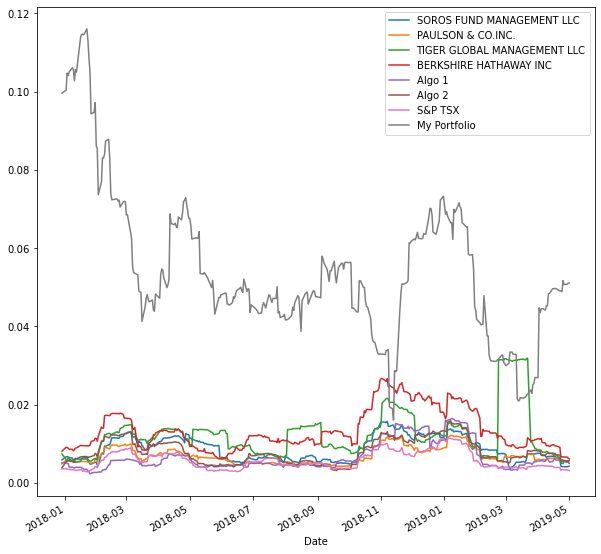

In [354]:
# Plot rolling standard deviation
new_rolling_std.plot(figsize=(10,10))

### Calculate and plot the correlation

In [355]:
# Calculate and plot the correlation
# Calculate the correlation
new_correlation = new_all_returns.corr()

# Display de correlation matrix
new_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.762876,0.516156,0.769353,0.308549,0.827727,0.678286,0.108995
PAULSON & CO.INC.,0.762876,1.000000,0.523516,0.641593,0.316777,0.792912,0.618928,0.147145
TIGER GLOBAL MANAGEMENT LLC,0.516156,0.523516,1.000000,0.366970,0.130839,0.477893,0.426770,0.002250
BERKSHIRE HATHAWAY INC,0.769353,0.641593,0.366970,1.000000,0.299437,0.775068,0.649157,0.153527
Algo 1,0.308549,0.316777,0.130839,0.299437,1.000000,0.317521,0.282333,0.048116
Algo 2,0.827727,0.792912,0.477893,0.775068,0.317521,1.000000,0.751612,0.115185
S&P TSX,0.678286,0.618928,0.426770,0.649157,0.282333,0.751612,1.000000,0.130265
My Portfolio,0.108995,0.147145,0.002250,0.153527,0.048116,0.115185,0.130265,1.000000


In [ ]:
# Plot correlation
# Import the Seaborn library
import seaborn as sns

<AxesSubplot:>

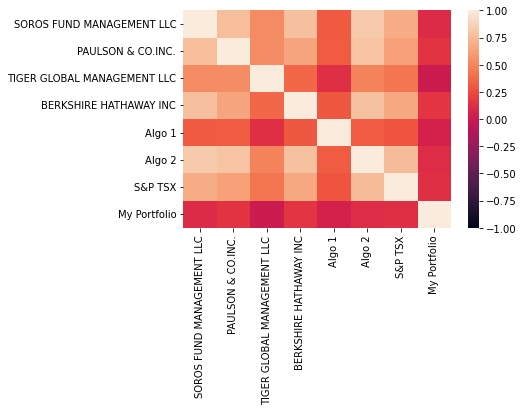

In [356]:
# Use the 'heatmap' function from the Seaborn library to visualise correlation
sns.heatmap(new_correlation, vmin = -1, vmax = 1)

<AxesSubplot:>

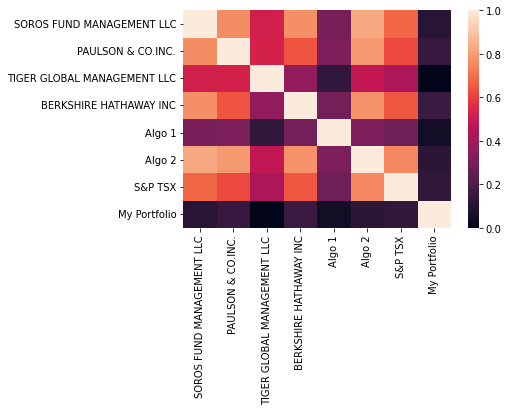

In [357]:
# Use the 'heatmap' function from the Seaborn library to visualise correlation
sns.heatmap(new_correlation, vmin = 0, vmax = 1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [358]:
# Calculate and plot Beta
# Calculate covariance of my portfolio
my_portfolio_covariance = new_all_returns["My Portfolio"].cov(new_all_returns["S&P TSX"])
my_portfolio_covariance

4.6244150305287036e-05

In [359]:
# Calculate variance of S&P TSX
variance = new_all_returns["S&P TSX"].var()
variance

3.749412657322241e-05

In [360]:
# Computing beta
my_portfolio_beta = my_portfolio_covariance / variance
my_portfolio_beta

1.2333705177790093

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}, xlabel='Date'>

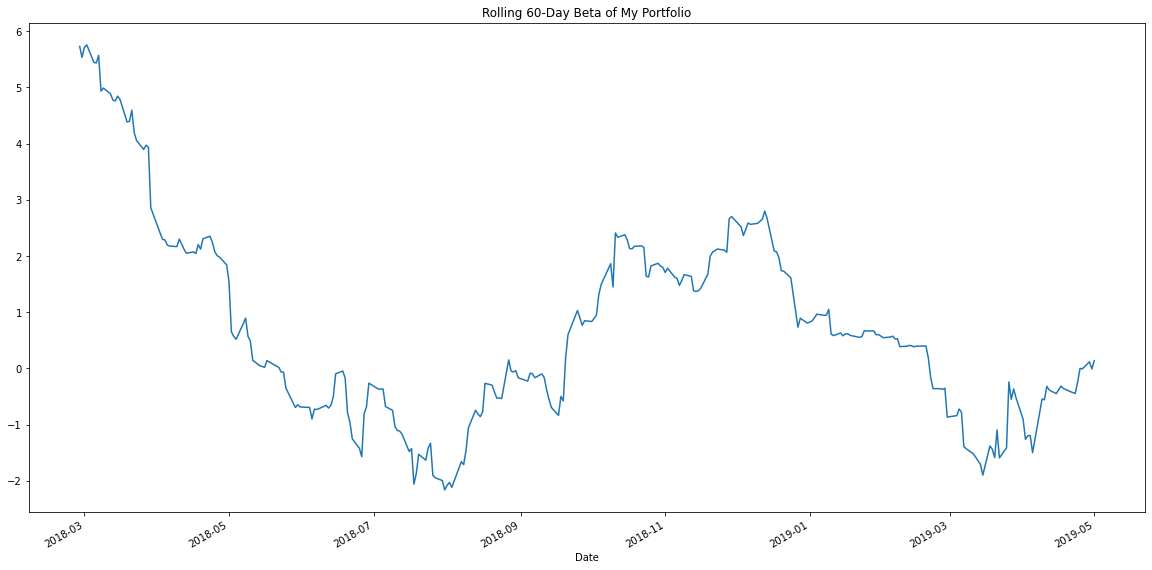

In [361]:
# Plot beta trend
# Calculate and plot the 60-day rolling beta for it and the S&P TSX 60

my_portfolio_rolling_covariance = new_all_returns["My Portfolio"].rolling(window=60).cov(new_all_returns["S&P TSX"])
new_rolling_variance = new_all_returns["S&P TSX"].rolling(window=60).var()
new_rolling_beta = my_portfolio_rolling_covariance / new_rolling_variance

new_rolling_beta.plot(figsize = (20,10), title="Rolling 60-Day Beta of My Portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [362]:
# Calculate Annualized Sharpe Ratios
new_sharpe_ratios = (new_all_returns.mean() * 252) / (new_all_returns.std() * np.sqrt(252))
new_sharpe_ratios

SOROS FUND MANAGEMENT LLC     -0.037480
PAULSON & CO.INC.             -0.229867
TIGER GLOBAL MANAGEMENT LLC   -1.355332
BERKSHIRE HATHAWAY INC         0.384625
Algo 1                         1.872918
Algo 2                         0.085993
S&P TSX                        0.171429
My Portfolio                  -0.402240
dtype: float64

<AxesSubplot:title={'center':'New Sharpe Ratios'}>

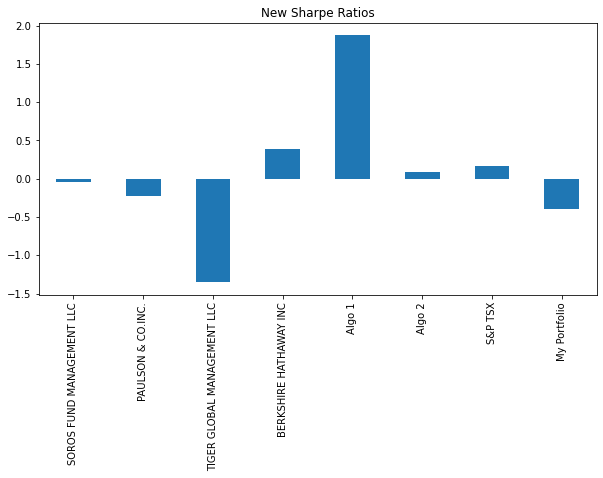

In [363]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot(kind="bar", title = "New Sharpe Ratios", figsize=(10,5))

### How does your portfolio do?

My portfolio has a low correlation to the market (S&P TSX) and to the other portfolios. It has a high volatility based on its standard deviation of 0.920339 annualised. The beta of 1.233371 is above 1, indicating that it is more volatile than the market.

Its Sharpe ratio of -0.402224 shows that it has not performed well compared to the market.